In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:/Stuff/datasets_721951_1255613_Country-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [48]:
df[(df['country']=='India') | (df['country']=='United States') | (df['country']=='China')]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
34,China,15.7,26.3,5.07,22.6,9530,6.94,74.6,1.59,4560
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.60,1350
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400


In [59]:
df[df['income']==min(df['income'])]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334


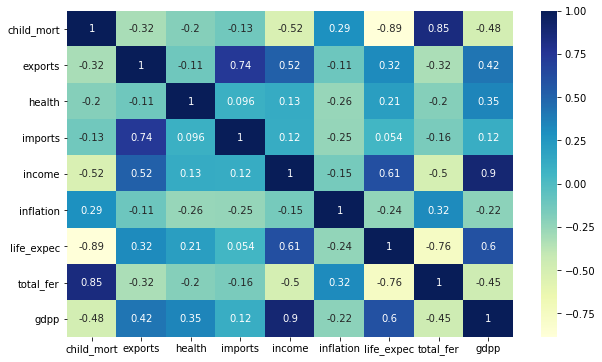

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

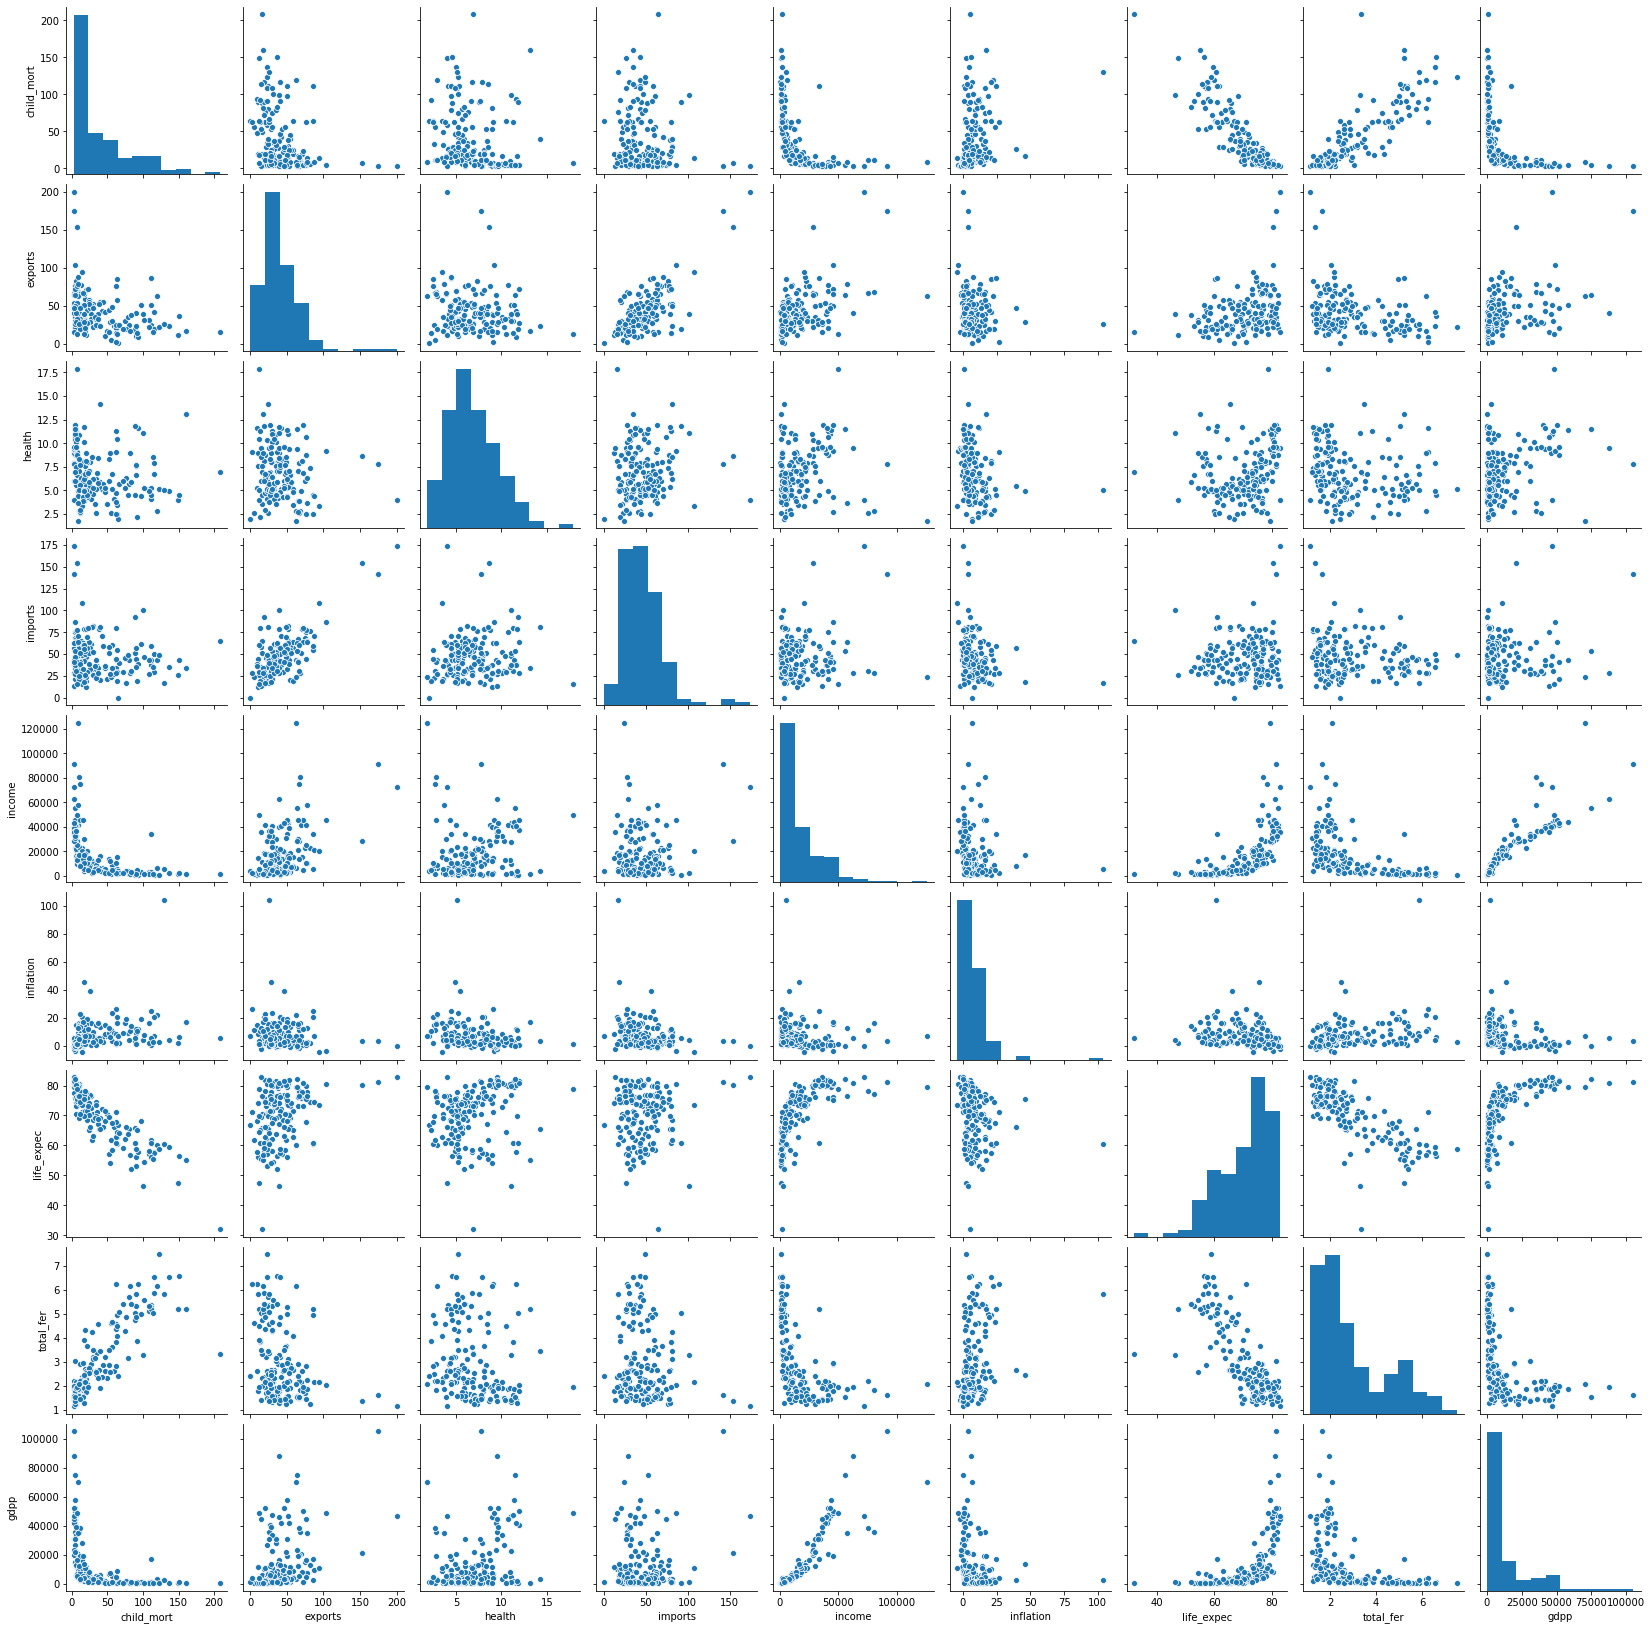

In [39]:
sns.pairplot(df)

In [197]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [64]:
df1=df[['child_mort','health','life_expec','total_fer','gdpp']]

In [65]:
scaler=MinMaxScaler()
sdata=scaler.fit(df1)

In [74]:
pca_data=PCA(n_components=2).fit_transform(df1)
pca_df=pd.DataFrame(pca_data,columns=['pca1','pca2'])

In [71]:
sse=[]
k_value=range(1,11)
for i in k_value:
    km=KMeans(n_clusters=i)
    km.fit(pca_df)
    sse.append(km.inertia_)
print(sse)

[55766557020.32851, 13270302581.126072, 6810150161.87503, 3500106851.0195727, 2333206896.9534197, 1696778913.4639735, 1123501403.89223, 869804423.2570279, 676294330.1531419, 507412854.43327093]


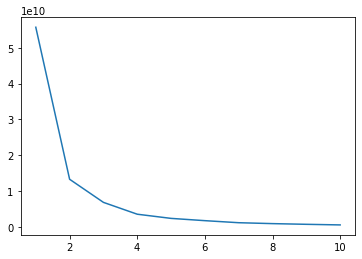

In [72]:
plt.plot(k_value,sse)

In [112]:
km=KMeans(n_clusters=2)
pred_target=km.fit_predict(pca_df)

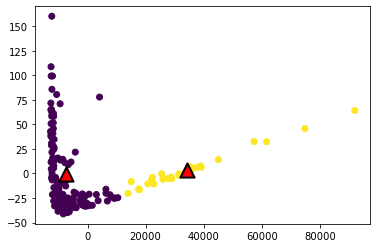

In [113]:
plt.scatter(pca_df.iloc[:,0],pca_df.iloc[:,1],c=pred_target)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',edgecolors='k',c='r',linewidths=2,s=200)

In [95]:
pca_df['pred_target']=pred_target

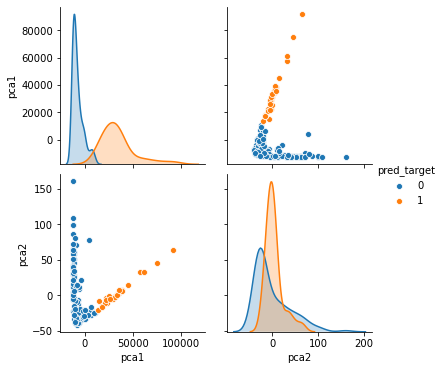

In [97]:
sns.pairplot(pca_df,hue='pred_target')

In [83]:
from sklearn.metrics import silhouette_score

In [114]:
silhouette_score(pca_df,pred_target)

0.7914705919311564

In [98]:
df['pred_target']=pred_target

In [100]:
df['pred_target'].value_counts()

0    137
1     30
Name: pred_target, dtype: int64

In [119]:
df2=df[['child_mort','health','life_expec','gdpp']]

In [120]:
pca_data1=PCA(n_components=2).fit_transform(df2)
pca_df1=pd.DataFrame(pca_data1,columns=['pca1','pca2'])

In [121]:
sse=[]
k_value=range(1,11)
for i in k_value:
    km=KMeans(n_clusters=i)
    km.fit(pca_df1)
    sse.append(km.inertia_)
print(sse)

[55766556745.444016, 13270302353.488758, 6810149936.748768, 3500106671.970849, 2333287943.9711695, 1701702414.2362585, 1123501265.4530091, 852706984.4920832, 678358988.4838706, 507696994.4031704]


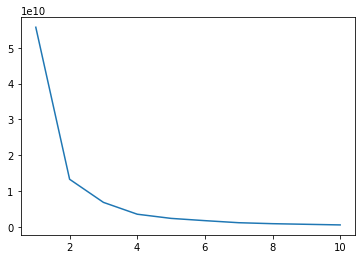

In [122]:
plt.plot(k_value,sse)

In [186]:
km=KMeans(n_clusters=4)
pred_target1=km.fit_predict(pca_df1)

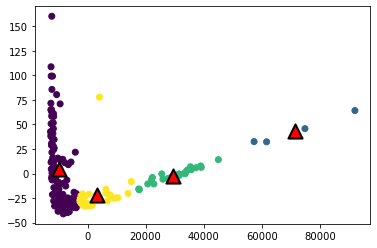

In [187]:
plt.scatter(pca_df1.iloc[:,0],pca_df1.iloc[:,1],c=pred_target1)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',edgecolors='k',c='r',linewidths=2,s=200)

In [188]:
pca_df1['pred_target1']=pred_target1

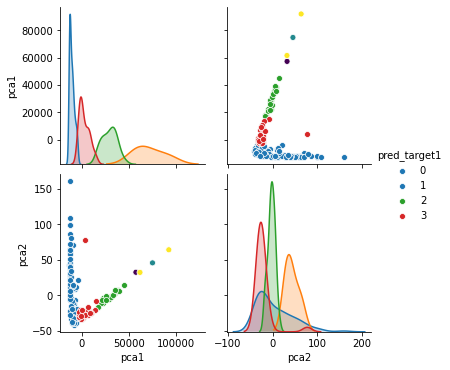

In [195]:
sns.pairplot(pca_df1,hue='pred_target1')

In [190]:
silhouette_score(pca_df1,pred_target1)

0.6842486113933606

In [191]:
df['pred_target2']=pred_target1

In [147]:
from sklearn.metrics import homogeneity_score

In [183]:
homogeneity_score(pred_target,pred_target1)

0.9074458115748794

In [192]:
df['pred_target2'].value_counts()

0    110
3     29
2     24
1      4
Name: pred_target2, dtype: int64

In [196]:
df[df['pred_target2']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pred_target,pred_target2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


In [201]:
dbs=DBSCAN()
dbs.fit_predict(df1)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)